In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

import pickle

%matplotlib inline

In [2]:
class PatientData:
    def __init__(self, file, **kwargs):
        self.file = file
        self.df = pd.read_csv(file, sep=kwargs['sep'])
    
    
    def getFile(self, **kwargs):
        return self.file
    
    
    def plotData(self,plottype, **kwargs):
        pass
    
    
    def get_data_frame(self):
        return self.df
    
    
    def add_column_df(self, column_name, feature_arr, new_column_name='-Transformation'):
        #feature_arr_T = feature_arr.transpose()
        #[self.df.insert(loc=df.columns.get_loc(column_name)+1+i, column=column_name[0:2]+str(i), value=new_col) 
                                                #for i, new_col in zip(range(len(feature_arr_T)), feature_arr_T)]
        self.df.insert(loc=self.df.columns.get_loc(column_name)+1, column=column_name+new_column_name, value=feature_arr.tolist())
        #self.df = self.df.assign(e=feature_arr)
        
    
    def show_dataframe(self, n=5):
        display(self.df.head(n))

In [3]:
#Discription of Data
folder_path = '../../../datalcdem/data/optima/dementia_18July/class_fast_normal_slow/'
pdata_disc = PatientData(folder_path + 'dataset_description.csv', sep=',')
pdf_disc = pdata_disc.get_data_frame() 
pdf_disc.shape
cols = pdf_disc.columns
arg_cols_list = []
tmp = []
for col in cols[1:]:  # removing patient_id
    tmp.append(col)
    if '_TF_' in col:
        arg_cols_list.append(tmp)
        tmp=[]
for mdf in arg_cols_list:
    display(pdf_disc[mdf].head(10))

,gender,gender_TF_
0,Male,"[0.0, 1.0]"
1,Female,"[1.0, 0.0]"
2,Male,"[0.0, 1.0]"
3,Male,"[0.0, 1.0]"
4,Male,"[0.0, 1.0]"
5,Female,"[1.0, 0.0]"
6,Male,"[0.0, 1.0]"
7,Male,"[0.0, 1.0]"
8,Male,"[0.0, 1.0]"
9,Male,"[0.0, 1.0]"


,dementia,dementia_TF_
0,False,"[1.0, 0.0]"
1,False,"[1.0, 0.0]"
2,True,"[0.0, 1.0]"
3,True,"[0.0, 1.0]"
4,True,"[0.0, 1.0]"
5,True,"[0.0, 1.0]"
6,False,"[1.0, 0.0]"
7,False,"[1.0, 0.0]"
8,True,"[0.0, 1.0]"
9,True,"[0.0, 1.0]"


,smoker,smoker_TF_
0,no_smoker,"[1.0, 0.0]"
1,smoker,"[0.0, 1.0]"
2,smoker,"[0.0, 1.0]"
3,smoker,"[0.0, 1.0]"
4,smoker,"[0.0, 1.0]"
5,no_smoker,"[1.0, 0.0]"
6,smoker,"[0.0, 1.0]"
7,smoker,"[0.0, 1.0]"
8,smoker,"[0.0, 1.0]"
9,smoker,"[0.0, 1.0]"


,alcohol,alcohol_TF_
0,mild_drinking,"[0.0, 1.0]"
1,mild_drinking,"[0.0, 1.0]"
2,mild_drinking,"[0.0, 1.0]"
3,extreme_drinking,"[1.0, 0.0]"
4,mild_drinking,"[0.0, 1.0]"
5,mild_drinking,"[0.0, 1.0]"
6,extreme_drinking,"[1.0, 0.0]"
7,extreme_drinking,"[1.0, 0.0]"
8,extreme_drinking,"[1.0, 0.0]"
9,extreme_drinking,"[1.0, 0.0]"


,education,education_TF_
0,higher,"[0.0, 1.0, 0.0]"
1,higher,"[0.0, 1.0, 0.0]"
2,higher,"[0.0, 1.0, 0.0]"
3,higher,"[0.0, 1.0, 0.0]"
4,NaN,"[0.0, 0.0, 0.0]"
5,medium,"[0.0, 0.0, 1.0]"
6,higher,"[0.0, 1.0, 0.0]"
7,higher,"[0.0, 1.0, 0.0]"
8,higher,"[0.0, 1.0, 0.0]"
9,higher,"[0.0, 1.0, 0.0]"


,bmi,bmi_TF_
0,NaN,NaN
1,23.0,"[22.0, 24.0)"
2,34.0,"[28.0, 37.0)"
3,25.0,"[24.0, 26.0)"
4,NaN,NaN
5,NaN,NaN
6,22.0,"[22.0, 24.0)"
7,NaN,NaN
8,31.0,"[28.0, 37.0)"
9,NaN,NaN


,weight,weight_TF_
0,NaN,NaN
1,54.0,"[46.0, 58.0)"
2,98.0,NaN
3,81.0,"[81.0, 98.0)"
4,NaN,NaN
5,NaN,NaN
6,71.0,"[65.0, 72.0)"
7,NaN,NaN
8,85.0,"[81.0, 98.0)"
9,NaN,NaN


,ageAtFirstEpisode,ageAtFirstEpisode_TF_
0,72,"[71.0, 76.0)"
1,80,"[76.0, 81.0)"
2,78,"[76.0, 81.0)"
3,66,"[65.0, 71.0)"
4,62,"[44.0, 65.0)"
5,83,"[81.0, 90.0)"
6,66,"[65.0, 71.0)"
7,46,"[44.0, 65.0)"
8,62,"[44.0, 65.0)"
9,55,"[44.0, 65.0)"


,ageAtLastEpisode,ageAtLastEpisode_TF_
0,73,"[70.0, 76.0)"
1,86,"[86.0, 94.0)"
2,85,"[80.0, 86.0)"
3,74,"[70.0, 76.0)"
4,69,"[51.0, 70.0)"
5,87,"[86.0, 94.0)"
6,70,"[70.0, 76.0)"
7,51,"[51.0, 70.0)"
8,70,"[70.0, 76.0)"
9,62,"[51.0, 70.0)"


,malignantComorbidity,malignantComorbidity_TF_
0,False,"[1.0, 0.0]"
1,False,"[1.0, 0.0]"
2,False,"[1.0, 0.0]"
3,True,"[0.0, 1.0]"
4,False,"[1.0, 0.0]"
5,False,"[1.0, 0.0]"
6,False,"[1.0, 0.0]"
7,False,"[1.0, 0.0]"
8,False,"[1.0, 0.0]"
9,False,"[1.0, 0.0]"


,systemicComorbidity,systemicComorbidity_TF_
0,False,"[1.0, 0.0]"
1,False,"[1.0, 0.0]"
2,True,"[0.0, 1.0]"
3,False,"[1.0, 0.0]"
4,True,"[0.0, 1.0]"
5,False,"[1.0, 0.0]"
6,False,"[1.0, 0.0]"
7,False,"[1.0, 0.0]"
8,False,"[1.0, 0.0]"
9,False,"[1.0, 0.0]"


,cardiovascularComorbidity,cardiovascularComorbidity_TF_
0,False,"[1.0, 0.0]"
1,False,"[1.0, 0.0]"
2,False,"[1.0, 0.0]"
3,False,"[1.0, 0.0]"
4,True,"[0.0, 1.0]"
5,True,"[0.0, 1.0]"
6,False,"[1.0, 0.0]"
7,False,"[1.0, 0.0]"
8,False,"[1.0, 0.0]"
9,False,"[1.0, 0.0]"


,metabolicComorbidity,metabolicComorbidity_TF_
0,False,"[1.0, 0.0]"
1,False,"[1.0, 0.0]"
2,False,"[1.0, 0.0]"
3,False,"[1.0, 0.0]"
4,False,"[1.0, 0.0]"
5,False,"[1.0, 0.0]"
6,False,"[1.0, 0.0]"
7,False,"[1.0, 0.0]"
8,False,"[1.0, 0.0]"
9,False,"[1.0, 0.0]"


,infectiousComorbidity,infectiousComorbidity_TF_
0,False,"[1.0, 0.0]"
1,False,"[1.0, 0.0]"
2,False,"[1.0, 0.0]"
3,False,"[1.0, 0.0]"
4,False,"[1.0, 0.0]"
5,False,"[1.0, 0.0]"
6,False,"[1.0, 0.0]"
7,False,"[1.0, 0.0]"
8,False,"[1.0, 0.0]"
9,False,"[1.0, 0.0]"


,neoplasticComorbidity,neoplasticComorbidity_TF_
0,False,[1.0]
1,False,[1.0]
2,False,[1.0]
3,False,[1.0]
4,False,[1.0]
5,False,[1.0]
6,False,[1.0]
7,False,[1.0]
8,False,[1.0]
9,False,[1.0]


,respiratoryComorbidity,respiratoryComorbidity_TF_
0,False,[1.0]
1,False,[1.0]
2,False,[1.0]
3,False,[1.0]
4,False,[1.0]
5,False,[1.0]
6,False,[1.0]
7,False,[1.0]
8,False,[1.0]
9,False,[1.0]


,neurologicalComorbidity,neurologicalComorbidity_TF_
0,False,"[1.0, 0.0]"
1,False,"[1.0, 0.0]"
2,False,"[1.0, 0.0]"
3,False,"[1.0, 0.0]"
4,False,"[1.0, 0.0]"
5,False,"[1.0, 0.0]"
6,False,"[1.0, 0.0]"
7,False,"[1.0, 0.0]"
8,False,"[1.0, 0.0]"
9,False,"[1.0, 0.0]"


,inflammatoryComorbidity,inflammatoryComorbidity_TF_
0,False,"[1.0, 0.0]"
1,False,"[1.0, 0.0]"
2,False,"[1.0, 0.0]"
3,False,"[1.0, 0.0]"
4,False,"[1.0, 0.0]"
5,False,"[1.0, 0.0]"
6,False,"[1.0, 0.0]"
7,False,"[1.0, 0.0]"
8,False,"[1.0, 0.0]"
9,False,"[1.0, 0.0]"


,apoe,apoe_TF_
0,E3E3,"[0.0, 0.0, 1.0, 0.0, 0.0]"
1,E3E4,"[0.0, 0.0, 0.0, 1.0, 0.0]"
2,E3E3,"[0.0, 0.0, 1.0, 0.0, 0.0]"
3,E3E4,"[0.0, 0.0, 0.0, 1.0, 0.0]"
4,E3E4,"[0.0, 0.0, 0.0, 1.0, 0.0]"
5,E2E4,"[0.0, 1.0, 0.0, 0.0, 0.0]"
6,E3E4,"[0.0, 0.0, 0.0, 1.0, 0.0]"
7,E3E3,"[0.0, 0.0, 1.0, 0.0, 0.0]"
8,E3E4,"[0.0, 0.0, 0.0, 1.0, 0.0]"
9,E3E4,"[0.0, 0.0, 0.0, 1.0, 0.0]"


,disorderName_cui,disorderName_cui_TF_
0,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,['C0162871'],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
5,['C0035439'],"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
6,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
7,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
8,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


,drugName_cui,drugName_cui_TF_
0,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,['C2346927'],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,['C2346927'],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"['C2346927', 'C0000970']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
4,['C0039943'],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,['C0591154'],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
6,"['C2346927', 'C0014695', 'C0042866']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
7,"['C0013065', 'C0040805', 'C0006949', 'C2346927', 'C0000970', 'C0701056']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
8,"['C0591259', 'C0592071', 'C2346927']","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


(214,) (214,) (1, 22)


,patient_id,EmptyValues
0,32,4
1,36,1
2,169,1
3,285,1
4,321,3


count    214.000000
mean     2.406542  
std      1.335030  
min      0.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      6.000000  
Name: EmptyValues, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15a8770208>]],
      dtype=object)

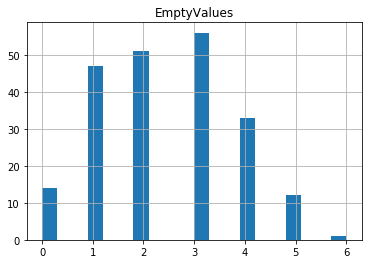

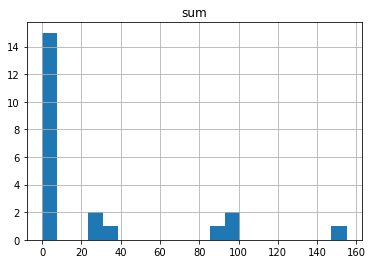

In [4]:
# To know numberof empty feature in that data
t_hor = pdf_disc[[col for col in pdf_disc.columns if '_TF_' not in col]].applymap(lambda x : pd.isna(x)).agg(['sum'],axis=1).iloc[:,0] # horizontal field
t_ver = pdf_disc[[col for col in pdf_disc.columns if '_TF_' not in col]].applymap(lambda x : pd.isna(x)).agg(['sum'],axis=0).iloc[:,1:] # vertical field


print(pdf_disc['patient_id'].shape, t_hor.shape, t_ver.shape)

pdf_disc_emptyvalue = pd.DataFrame(data= {'patient_id':pdf_disc['patient_id'], 'EmptyValues':t_hor})

display(pdf_disc_emptyvalue.head(5))

display( pdf_disc_emptyvalue['EmptyValues'].describe())

pdf_disc_emptyvalue.hist(column=['EmptyValues'], bins=20)

t_ver.transpose().hist(column=['sum'], bins=20)

#display( t_ver['EmptyValues'].describe())

In [5]:
# DementiaPatientData_Label
pdataLabel = PatientData(folder_path + 'dataset_description.csv', sep=',')
#pdataLabel.show_dataframe()
display(pdataLabel.get_data_frame().describe(include='all'))

pdf_label = pdataLabel.get_data_frame()[['patient_id','patient_class']]
pdf_label.head(20)

,patient_id,gender,gender_TF_,dementia,dementia_TF_,smoker,smoker_TF_,alcohol,alcohol_TF_,education,education_TF_,bmi,bmi_TF_,weight,weight_TF_,ageAtFirstEpisode,ageAtFirstEpisode_TF_,ageAtLastEpisode,ageAtLastEpisode_TF_,malignantComorbidity,malignantComorbidity_TF_,systemicComorbidity,systemicComorbidity_TF_,cardiovascularComorbidity,cardiovascularComorbidity_TF_,metabolicComorbidity,metabolicComorbidity_TF_,infectiousComorbidity,infectiousComorbidity_TF_,neoplasticComorbidity,neoplasticComorbidity_TF_,respiratoryComorbidity,respiratoryComorbidity_TF_,neurologicalComorbidity,neurologicalComorbidity_TF_,inflammatoryComorbidity,inflammatoryComorbidity_TF_,apoe,apoe_TF_,disorderName_cui,disorderName_cui_TF_,drugName_cui,drugName_cui_TF_,patient_class
count,214.000000,214,214,214,214,213,214,213,214,128,214,121.000000,120,121.000000,119,214.000000,212,214.000000,213,184,214,190,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,59,214,182,214,214.000000
unique,NaN,2,2,2,2,2,3,2,3,3,4,NaN,5,NaN,5,NaN,5,NaN,5,2,3,2,3,2,2,2,2,2,2,1,1,1,1,2,2,2,2,5,5,45,46,149,147,NaN
top,NaN,Male,"[0.0, 1.0]",False,"[1.0, 0.0]",smoker,"[0.0, 1.0]",extreme_drinking,"[1.0, 0.0]",higher,"[0.0, 1.0, 0.0]",NaN,"[28.0, 37.0)",NaN,"[46.0, 58.0)",NaN,"[71.0, 76.0)",NaN,"[80.0, 86.0)",False,"[1.0, 0.0]",False,"[1.0, 0.0]",False,"[1.0, 0.0]",False,"[1.0, 0.0]",False,"[1.0, 0.0]",False,[1.0],False,[1.0],False,"[1.0, 0.0]",False,"[1.0, 0.0]",E3E4,"[0.0, 0.0, 0.0, 1.0, 0.0]",['C0010054'],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['C2346927'],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN
freq,NaN,109,109,144,144,131,131,113,113,87,87,NaN,31,NaN,24,NaN,45,NaN,49,133,133,163,163,198,198,202,202,209,209,214,214,214,214,205,205,209,209,92,92,6,155,14,32,NaN
mean,5051.191589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.140496,NaN,69.438017,NaN,72.588785,NaN,77.387850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.116822
std,2404.751440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.931297,NaN,12.654309,NaN,9.358738,NaN,8.947108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.051084
min,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,46.000000,NaN,44.000000,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,3129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,61.000000,NaN,67.000000,NaN,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,5231.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,68.000000,NaN,74.000000,NaN,78.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,6929.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,NaN,80.000000,NaN,79.000000,NaN,85.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


,patient_id,patient_class
0,32,3
1,36,7
2,169,2
3,285,7
4,321,7
5,383,6
6,409,6
7,582,6
8,650,5
9,675,5


In [6]:
# Transformed LCPatientData
file_name = 'dataset_DementiaPatient'

pdata = PatientData(folder_path + file_name + '.csv', sep=',')
pdata.show_dataframe(n=20)
pdf = pdata.get_data_frame() 
display(pdf.columns, pdf.shape)
display(pdf.describe())

#Sorted patient_id
pdf.sort_values(by=['patient_id']).head(20)

,patient_id,gender_TFV_Female,gender_TFV_Male,dementia_TFV_False,dementia_TFV_True,smoker_TFV_no_smoker,smoker_TFV_smoker,alcohol_TFV_extreme_drinking,alcohol_TFV_mild_drinking,education_TFV_basic,education_TFV_higher,education_TFV_medium,"bmi_TFV_[16.0, 22.0)","bmi_TFV_[22.0, 24.0)","bmi_TFV_[24.0, 26.0)","bmi_TFV_[26.0, 28.0)","bmi_TFV_[28.0, 37.0)","weight_TFV_[46.0, 58.0)","weight_TFV_[58.0, 65.0)","weight_TFV_[65.0, 72.0)","weight_TFV_[72.0, 81.0)","weight_TFV_[81.0, 98.0)","ageAtFirstEpisode_TFV_[44.0, 65.0)","ageAtFirstEpisode_TFV_[65.0, 71.0)","ageAtFirstEpisode_TFV_[71.0, 76.0)","ageAtFirstEpisode_TFV_[76.0, 81.0)","ageAtFirstEpisode_TFV_[81.0, 90.0)","ageAtLastEpisode_TFV_[51.0, 70.0)","ageAtLastEpisode_TFV_[70.0, 76.0)","ageAtLastEpisode_TFV_[76.0, 80.0)","ageAtLastEpisode_TFV_[80.0, 86.0)","ageAtLastEpisode_TFV_[86.0, 94.0)",malignantComorbidity_TFV_False,malignantComorbidity_TFV_True,systemicComorbidity_TFV_False,systemicComorbidity_TFV_True,cardiovascularComorbidity_TFV_False,cardiovascularComorbidity_TFV_True,metabolicComorbidity_TFV_False,metabolicComorbidity_TFV_True,infectiousComorbidity_TFV_False,infectiousComorbidity_TFV_True,neoplasticComorbidity_TFV_False,respiratoryComorbidity_TFV_False,neurologicalComorbidity_TFV_False,neurologicalComorbidity_TFV_True,inflammatoryComorbidity_TFV_False,inflammatoryComorbidity_TFV_True,apoe_TFV_E2E3,apoe_TFV_E2E4,apoe_TFV_E3E3,apoe_TFV_E3E4,apoe_TFV_E4E4,disorderName_cui_TFV_C0011847,disorderName_cui_TFV_C0041296,disorderName_cui_TFV_C0035439,disorderName_cui_TFV_C0040145,disorderName_cui_TFV_C0014544,disorderName_cui_TFV_C0442874,disorderName_cui_TFV_C0019158,disorderName_cui_TFV_C0586324,disorderName_cui_TFV_C0428796,disorderName_cui_TFV_C0235480,disorderName_cui_TFV_C0027051,disorderName_cui_TFV_C0032533,disorderName_cui_TFV_C0271650,disorderName_cui_TFV_C0162323,disorderName_cui_TFV_C0028754,disorderName_cui_TFV_C0033860,disorderName_cui_TFV_C0007787,disorderName_cui_TFV_C1260873,disorderName_cui_TFV_C0040147,disorderName_cui_TFV_C0012546,disorderName_cui_TFV_C0034065,disorderName_cui_TFV_C0026769,disorderName_cui_TFV_C0024437,disorderName_cui_TFV_C0012634,disorderName_cui_TFV_C0013806,disorderName_cui_TFV_C0011854,disorderName_cui_TFV_C0010054,disorderName_cui_TFV_C0030567,disorderName_cui_TFV_C0007194,disorderName_cui_TFV_C0003873,disorderName_cui_TFV_C0497299,disorderName_cui_TFV_C0341439,disorderName_cui_TFV_C0042847,disorderName_cui_TFV_C0878544,disorderName_cui_TFV_C3864075,disorderName_cui_TFV_C1384641,disorderName_cui_TFV_C1456822,disorderName_cui_TFV_C0948465,disorderName_cui_TFV_C0018801,disorderName_cui_TFV_C3495438,disorderName_cui_TFV_C0002871,disorderName_cui_TFV_C0162871,disorderName_cui_TFV_C0010055,disorderName_cui_TFV_C0189817,disorderName_cui_TFV_C0020473,disorderName_cui_TFV_C0014038,disorderName_cui_TFV_C0085096,drugName_cui_TFV_C0591259,drugName_cui_TFV_C0700452,drugName_cui_TFV_C0795635,drugName_cui_TFV_C0128101,drugName_cui_TFV_C0003289,drugName_cui_TFV_C0085217,drugName_cui_TFV_C0000981,drugName_cui_TFV_C0025598,drugName_cui_TFV_C0031617,drugName_cui_TFV_C0065502,drugName_cui_TFV_C0011812,drugName_cui_TFV_C0700087,drugName_cui_TFV_C1601799,drugName_cui_TFV_C0087162,drugName_cui_TFV_C1119918,drugName_cui_TFV_C0546849,drugName_cui_TFV_C0020223,drugName_cui_TFV_C0730987,drugName_cui_TFV_C0006949,drugName_cui_TFV_C1166521,drugName_cui_TFV_C0719198,drugName_cui_TFV_C0036579,drugName_cui_TFV_C0770893,drugName_cui_TFV_C0032085,drugName_cui_TFV_C0029309,drugName_cui_TFV_C0678180,drugName_cui_TFV_C0031977,drugName_cui_TFV_C0301404,drugName_cui_TFV_C0526399,drugName_cui_TFV_C0591573,drugName_cui_TFV_C0012010,drugName_cui_TFV_C0699999,drugName_cui_TFV_C0600062,drugName_cui_TFV_C0025859,drugName_cui_TFV_C0591307,drugName_cui_TFV_C0593879,drugName_cui_TFV_C3541396,drugName_cui_TFV_C0023870,drugName_cui_TFV_C0125997,drugName_cui_TFV_C0032825,drugName_cui_TFV_C0031990,drugName_cui_TFV_C0017720,drugName_cui_TFV_C0128805,drugName_cui_TFV_C2349136,drugName_cui_

Index(['patient_id', 'gender_TFV_Female', 'gender_TFV_Male',
       'dementia_TFV_False', 'dementia_TFV_True', 'smoker_TFV_no_smoker',
       'smoker_TFV_smoker', 'alcohol_TFV_extreme_drinking',
       'alcohol_TFV_mild_drinking', 'education_TFV_basic',
       ...
       'drugName_cui_TFV_C0004147', 'drugName_cui_TFV_C0004609',
       'drugName_cui_TFV_C0000970', 'drugName_cui_TFV_C0064636',
       'drugName_cui_TFV_C0591154', 'drugName_cui_TFV_C0055147',
       'drugName_cui_TFV_C0041009', 'drugName_cui_TFV_C0872895',
       'drugName_cui_TFV_C0376218', 'drugName_cui_TFV_C0005013'],
      dtype='object', length=220)

(214, 220)

,patient_id,gender_TFV_Female,gender_TFV_Male,dementia_TFV_False,dementia_TFV_True,smoker_TFV_no_smoker,smoker_TFV_smoker,alcohol_TFV_extreme_drinking,alcohol_TFV_mild_drinking,education_TFV_basic,education_TFV_higher,education_TFV_medium,"bmi_TFV_[16.0, 22.0)","bmi_TFV_[22.0, 24.0)","bmi_TFV_[24.0, 26.0)","bmi_TFV_[26.0, 28.0)","bmi_TFV_[28.0, 37.0)","weight_TFV_[46.0, 58.0)","weight_TFV_[58.0, 65.0)","weight_TFV_[65.0, 72.0)","weight_TFV_[72.0, 81.0)","weight_TFV_[81.0, 98.0)","ageAtFirstEpisode_TFV_[44.0, 65.0)","ageAtFirstEpisode_TFV_[65.0, 71.0)","ageAtFirstEpisode_TFV_[71.0, 76.0)","ageAtFirstEpisode_TFV_[76.0, 81.0)","ageAtFirstEpisode_TFV_[81.0, 90.0)","ageAtLastEpisode_TFV_[51.0, 70.0)","ageAtLastEpisode_TFV_[70.0, 76.0)","ageAtLastEpisode_TFV_[76.0, 80.0)","ageAtLastEpisode_TFV_[80.0, 86.0)","ageAtLastEpisode_TFV_[86.0, 94.0)",malignantComorbidity_TFV_False,malignantComorbidity_TFV_True,systemicComorbidity_TFV_False,systemicComorbidity_TFV_True,cardiovascularComorbidity_TFV_False,cardiovascularComorbidity_TFV_True,metabolicComorbidity_TFV_False,metabolicComorbidity_TFV_True,infectiousComorbidity_TFV_False,infectiousComorbidity_TFV_True,neoplasticComorbidity_TFV_False,respiratoryComorbidity_TFV_False,neurologicalComorbidity_TFV_False,neurologicalComorbidity_TFV_True,inflammatoryComorbidity_TFV_False,inflammatoryComorbidity_TFV_True,apoe_TFV_E2E3,apoe_TFV_E2E4,apoe_TFV_E3E3,apoe_TFV_E3E4,apoe_TFV_E4E4,disorderName_cui_TFV_C0011847,disorderName_cui_TFV_C0041296,disorderName_cui_TFV_C0035439,disorderName_cui_TFV_C0040145,disorderName_cui_TFV_C0014544,disorderName_cui_TFV_C0442874,disorderName_cui_TFV_C0019158,disorderName_cui_TFV_C0586324,disorderName_cui_TFV_C0428796,disorderName_cui_TFV_C0235480,disorderName_cui_TFV_C0027051,disorderName_cui_TFV_C0032533,disorderName_cui_TFV_C0271650,disorderName_cui_TFV_C0162323,disorderName_cui_TFV_C0028754,disorderName_cui_TFV_C0033860,disorderName_cui_TFV_C0007787,disorderName_cui_TFV_C1260873,disorderName_cui_TFV_C0040147,disorderName_cui_TFV_C0012546,disorderName_cui_TFV_C0034065,disorderName_cui_TFV_C0026769,disorderName_cui_TFV_C0024437,disorderName_cui_TFV_C0012634,disorderName_cui_TFV_C0013806,disorderName_cui_TFV_C0011854,disorderName_cui_TFV_C0010054,disorderName_cui_TFV_C0030567,disorderName_cui_TFV_C0007194,disorderName_cui_TFV_C0003873,disorderName_cui_TFV_C0497299,disorderName_cui_TFV_C0341439,disorderName_cui_TFV_C0042847,disorderName_cui_TFV_C0878544,disorderName_cui_TFV_C3864075,disorderName_cui_TFV_C1384641,disorderName_cui_TFV_C1456822,disorderName_cui_TFV_C0948465,disorderName_cui_TFV_C0018801,disorderName_cui_TFV_C3495438,disorderName_cui_TFV_C0002871,disorderName_cui_TFV_C0162871,disorderName_cui_TFV_C0010055,disorderName_cui_TFV_C0189817,disorderName_cui_TFV_C0020473,disorderName_cui_TFV_C0014038,disorderName_cui_TFV_C0085096,drugName_cui_TFV_C0591259,drugName_cui_TFV_C0700452,drugName_cui_TFV_C0795635,drugName_cui_TFV_C0128101,drugName_cui_TFV_C0003289,drugName_cui_TFV_C0085217,drugName_cui_TFV_C0000981,drugName_cui_TFV_C0025598,drugName_cui_TFV_C0031617,drugName_cui_TFV_C0065502,drugName_cui_TFV_C0011812,drugName_cui_TFV_C0700087,drugName_cui_TFV_C1601799,drugName_cui_TFV_C0087162,drugName_cui_TFV_C1119918,drugName_cui_TFV_C0546849,drugName_cui_TFV_C0020223,drugName_cui_TFV_C0730987,drugName_cui_TFV_C0006949,drugName_cui_TFV_C1166521,drugName_cui_TFV_C0719198,drugName_cui_TFV_C0036579,drugName_cui_TFV_C0770893,drugName_cui_TFV_C0032085,drugName_cui_TFV_C0029309,drugName_cui_TFV_C0678180,drugName_cui_TFV_C0031977,drugName_cui_TFV_C0301404,drugName_cui_TFV_C0526399,drugName_cui_TFV_C0591573,drugName_cui_TFV_C0012010,drugName_cui_TFV_C0699999,drugName_cui_TFV_C0600062,drugName_cui_TFV_C0025859,drugName_cui_TFV_C0591307,drugName_cui_TFV_C0593879,drugName_cui_TFV_C3541396,drugName_cui_TFV_C0023870,drugName_cui_TFV_C0125997,drugName_cui_TFV_C0032825,drugName_cui_TFV_C0031990,drugName_cui_TFV_C0017720,drugName_cui_TFV_C0128805,drugName_cui_TFV_C2349136,drugName_cui_

,patient_id,gender_TFV_Female,gender_TFV_Male,dementia_TFV_False,dementia_TFV_True,smoker_TFV_no_smoker,smoker_TFV_smoker,alcohol_TFV_extreme_drinking,alcohol_TFV_mild_drinking,education_TFV_basic,education_TFV_higher,education_TFV_medium,"bmi_TFV_[16.0, 22.0)","bmi_TFV_[22.0, 24.0)","bmi_TFV_[24.0, 26.0)","bmi_TFV_[26.0, 28.0)","bmi_TFV_[28.0, 37.0)","weight_TFV_[46.0, 58.0)","weight_TFV_[58.0, 65.0)","weight_TFV_[65.0, 72.0)","weight_TFV_[72.0, 81.0)","weight_TFV_[81.0, 98.0)","ageAtFirstEpisode_TFV_[44.0, 65.0)","ageAtFirstEpisode_TFV_[65.0, 71.0)","ageAtFirstEpisode_TFV_[71.0, 76.0)","ageAtFirstEpisode_TFV_[76.0, 81.0)","ageAtFirstEpisode_TFV_[81.0, 90.0)","ageAtLastEpisode_TFV_[51.0, 70.0)","ageAtLastEpisode_TFV_[70.0, 76.0)","ageAtLastEpisode_TFV_[76.0, 80.0)","ageAtLastEpisode_TFV_[80.0, 86.0)","ageAtLastEpisode_TFV_[86.0, 94.0)",malignantComorbidity_TFV_False,malignantComorbidity_TFV_True,systemicComorbidity_TFV_False,systemicComorbidity_TFV_True,cardiovascularComorbidity_TFV_False,cardiovascularComorbidity_TFV_True,metabolicComorbidity_TFV_False,metabolicComorbidity_TFV_True,infectiousComorbidity_TFV_False,infectiousComorbidity_TFV_True,neoplasticComorbidity_TFV_False,respiratoryComorbidity_TFV_False,neurologicalComorbidity_TFV_False,neurologicalComorbidity_TFV_True,inflammatoryComorbidity_TFV_False,inflammatoryComorbidity_TFV_True,apoe_TFV_E2E3,apoe_TFV_E2E4,apoe_TFV_E3E3,apoe_TFV_E3E4,apoe_TFV_E4E4,disorderName_cui_TFV_C0011847,disorderName_cui_TFV_C0041296,disorderName_cui_TFV_C0035439,disorderName_cui_TFV_C0040145,disorderName_cui_TFV_C0014544,disorderName_cui_TFV_C0442874,disorderName_cui_TFV_C0019158,disorderName_cui_TFV_C0586324,disorderName_cui_TFV_C0428796,disorderName_cui_TFV_C0235480,disorderName_cui_TFV_C0027051,disorderName_cui_TFV_C0032533,disorderName_cui_TFV_C0271650,disorderName_cui_TFV_C0162323,disorderName_cui_TFV_C0028754,disorderName_cui_TFV_C0033860,disorderName_cui_TFV_C0007787,disorderName_cui_TFV_C1260873,disorderName_cui_TFV_C0040147,disorderName_cui_TFV_C0012546,disorderName_cui_TFV_C0034065,disorderName_cui_TFV_C0026769,disorderName_cui_TFV_C0024437,disorderName_cui_TFV_C0012634,disorderName_cui_TFV_C0013806,disorderName_cui_TFV_C0011854,disorderName_cui_TFV_C0010054,disorderName_cui_TFV_C0030567,disorderName_cui_TFV_C0007194,disorderName_cui_TFV_C0003873,disorderName_cui_TFV_C0497299,disorderName_cui_TFV_C0341439,disorderName_cui_TFV_C0042847,disorderName_cui_TFV_C0878544,disorderName_cui_TFV_C3864075,disorderName_cui_TFV_C1384641,disorderName_cui_TFV_C1456822,disorderName_cui_TFV_C0948465,disorderName_cui_TFV_C0018801,disorderName_cui_TFV_C3495438,disorderName_cui_TFV_C0002871,disorderName_cui_TFV_C0162871,disorderName_cui_TFV_C0010055,disorderName_cui_TFV_C0189817,disorderName_cui_TFV_C0020473,disorderName_cui_TFV_C0014038,disorderName_cui_TFV_C0085096,drugName_cui_TFV_C0591259,drugName_cui_TFV_C0700452,drugName_cui_TFV_C0795635,drugName_cui_TFV_C0128101,drugName_cui_TFV_C0003289,drugName_cui_TFV_C0085217,drugName_cui_TFV_C0000981,drugName_cui_TFV_C0025598,drugName_cui_TFV_C0031617,drugName_cui_TFV_C0065502,drugName_cui_TFV_C0011812,drugName_cui_TFV_C0700087,drugName_cui_TFV_C1601799,drugName_cui_TFV_C0087162,drugName_cui_TFV_C1119918,drugName_cui_TFV_C0546849,drugName_cui_TFV_C0020223,drugName_cui_TFV_C0730987,drugName_cui_TFV_C0006949,drugName_cui_TFV_C1166521,drugName_cui_TFV_C0719198,drugName_cui_TFV_C0036579,drugName_cui_TFV_C0770893,drugName_cui_TFV_C0032085,drugName_cui_TFV_C0029309,drugName_cui_TFV_C0678180,drugName_cui_TFV_C0031977,drugName_cui_TFV_C0301404,drugName_cui_TFV_C0526399,drugName_cui_TFV_C0591573,drugName_cui_TFV_C0012010,drugName_cui_TFV_C0699999,drugName_cui_TFV_C0600062,drugName_cui_TFV_C0025859,drugName_cui_TFV_C0591307,drugName_cui_TFV_C0593879,drugName_cui_TFV_C3541396,drugName_cui_TFV_C0023870,drugName_cui_TFV_C0125997,drugName_cui_TFV_C0032825,drugName_cui_TFV_C0031990,drugName_cui_TFV_C0017720,drugName_cui_TFV_C0128805,drugName_cui_TFV_C2349136,drugName_cui_

In [7]:
# Analysis data and remove unnecessary columns

#get column names
pdf_tran = pdf.transpose()
pdf = pdf_tran[pdf.max(axis=0) > 0.0].transpose()
display(pdf.head(5), pdf.shape)

pdf.to_csv(folder_path + file_name + '_fltrcols' +'.csv', index=False)

# pdf_drop = pdf.drop([col for col in pdf.columns if 'stage-' in col], axis=1).reset_index(drop=True) # Drop stage stage column
# pdf_drop.to_csv(folder_path + file_name + '_fltrcols_nostage' +'.csv', index=False)

,patient_id,gender_TFV_Female,gender_TFV_Male,dementia_TFV_False,dementia_TFV_True,smoker_TFV_no_smoker,smoker_TFV_smoker,alcohol_TFV_extreme_drinking,alcohol_TFV_mild_drinking,education_TFV_basic,education_TFV_higher,education_TFV_medium,"bmi_TFV_[16.0, 22.0)","bmi_TFV_[22.0, 24.0)","bmi_TFV_[24.0, 26.0)","bmi_TFV_[26.0, 28.0)","bmi_TFV_[28.0, 37.0)","weight_TFV_[46.0, 58.0)","weight_TFV_[58.0, 65.0)","weight_TFV_[65.0, 72.0)","weight_TFV_[72.0, 81.0)","weight_TFV_[81.0, 98.0)","ageAtFirstEpisode_TFV_[44.0, 65.0)","ageAtFirstEpisode_TFV_[65.0, 71.0)","ageAtFirstEpisode_TFV_[71.0, 76.0)","ageAtFirstEpisode_TFV_[76.0, 81.0)","ageAtFirstEpisode_TFV_[81.0, 90.0)","ageAtLastEpisode_TFV_[51.0, 70.0)","ageAtLastEpisode_TFV_[70.0, 76.0)","ageAtLastEpisode_TFV_[76.0, 80.0)","ageAtLastEpisode_TFV_[80.0, 86.0)","ageAtLastEpisode_TFV_[86.0, 94.0)",malignantComorbidity_TFV_False,malignantComorbidity_TFV_True,systemicComorbidity_TFV_False,systemicComorbidity_TFV_True,cardiovascularComorbidity_TFV_False,cardiovascularComorbidity_TFV_True,metabolicComorbidity_TFV_False,metabolicComorbidity_TFV_True,infectiousComorbidity_TFV_False,infectiousComorbidity_TFV_True,neoplasticComorbidity_TFV_False,respiratoryComorbidity_TFV_False,neurologicalComorbidity_TFV_False,neurologicalComorbidity_TFV_True,inflammatoryComorbidity_TFV_False,inflammatoryComorbidity_TFV_True,apoe_TFV_E2E3,apoe_TFV_E2E4,apoe_TFV_E3E3,apoe_TFV_E3E4,apoe_TFV_E4E4,disorderName_cui_TFV_C0011847,disorderName_cui_TFV_C0041296,disorderName_cui_TFV_C0035439,disorderName_cui_TFV_C0040145,disorderName_cui_TFV_C0014544,disorderName_cui_TFV_C0442874,disorderName_cui_TFV_C0019158,disorderName_cui_TFV_C0586324,disorderName_cui_TFV_C0428796,disorderName_cui_TFV_C0235480,disorderName_cui_TFV_C0027051,disorderName_cui_TFV_C0032533,disorderName_cui_TFV_C0271650,disorderName_cui_TFV_C0162323,disorderName_cui_TFV_C0028754,disorderName_cui_TFV_C0033860,disorderName_cui_TFV_C0007787,disorderName_cui_TFV_C1260873,disorderName_cui_TFV_C0040147,disorderName_cui_TFV_C0012546,disorderName_cui_TFV_C0034065,disorderName_cui_TFV_C0026769,disorderName_cui_TFV_C0024437,disorderName_cui_TFV_C0012634,disorderName_cui_TFV_C0013806,disorderName_cui_TFV_C0011854,disorderName_cui_TFV_C0010054,disorderName_cui_TFV_C0030567,disorderName_cui_TFV_C0007194,disorderName_cui_TFV_C0003873,disorderName_cui_TFV_C0497299,disorderName_cui_TFV_C0341439,disorderName_cui_TFV_C0042847,disorderName_cui_TFV_C0878544,disorderName_cui_TFV_C3864075,disorderName_cui_TFV_C1384641,disorderName_cui_TFV_C1456822,disorderName_cui_TFV_C0948465,disorderName_cui_TFV_C0018801,disorderName_cui_TFV_C3495438,disorderName_cui_TFV_C0002871,disorderName_cui_TFV_C0162871,disorderName_cui_TFV_C0010055,disorderName_cui_TFV_C0189817,disorderName_cui_TFV_C0020473,disorderName_cui_TFV_C0014038,disorderName_cui_TFV_C0085096,drugName_cui_TFV_C0591259,drugName_cui_TFV_C0700452,drugName_cui_TFV_C0795635,drugName_cui_TFV_C0128101,drugName_cui_TFV_C0003289,drugName_cui_TFV_C0085217,drugName_cui_TFV_C0000981,drugName_cui_TFV_C0025598,drugName_cui_TFV_C0031617,drugName_cui_TFV_C0065502,drugName_cui_TFV_C0011812,drugName_cui_TFV_C0700087,drugName_cui_TFV_C1601799,drugName_cui_TFV_C0087162,drugName_cui_TFV_C1119918,drugName_cui_TFV_C0546849,drugName_cui_TFV_C0020223,drugName_cui_TFV_C0730987,drugName_cui_TFV_C0006949,drugName_cui_TFV_C1166521,drugName_cui_TFV_C0719198,drugName_cui_TFV_C0036579,drugName_cui_TFV_C0770893,drugName_cui_TFV_C0032085,drugName_cui_TFV_C0029309,drugName_cui_TFV_C0678180,drugName_cui_TFV_C0031977,drugName_cui_TFV_C0301404,drugName_cui_TFV_C0526399,drugName_cui_TFV_C0591573,drugName_cui_TFV_C0012010,drugName_cui_TFV_C0699999,drugName_cui_TFV_C0600062,drugName_cui_TFV_C0025859,drugName_cui_TFV_C0591307,drugName_cui_TFV_C0593879,drugName_cui_TFV_C3541396,drugName_cui_TFV_C0023870,drugName_cui_TFV_C0125997,drugName_cui_TFV_C0032825,drugName_cui_TFV_C0031990,drugName_cui_TFV_C0017720,drugName_cui_TFV_C0128805,drugName_cui_TFV_C2349136,drugName_cui_

(214, 220)

In [18]:
# merge dataframe based on id
display(pdf.head(5))
display(pdf_label.head(5))

pdf_surmon = pd.merge(pdf, pdf_label, on=['patient_id'] )
pdf_surmon_cols = pdf_surmon.columns.tolist()
pdf_data = pdf_surmon[pdf_surmon_cols[0:1] + pdf_surmon_cols[-1:] + pdf_surmon_cols[1:-1]]
display(pdf_data[pdf_data['patient_id']==32]['patient_class'], pdf_label[pdf_label['patient_id']==32]['patient_class'])
display(pdf_data.head(5), pdf_data.shape)

pdf_data.to_csv(folder_path + file_name + '_fltrcols_allfeatures' +'.csv', index=False)

target_real = pdf_data['patient_class'].values
target = pdf_data['patient_class'].values
target_names = pdf_data['patient_class'].values

data = pdf_data.iloc[:,2:].values    # drop stages columns for this particular case
class_names = ['MiMo_2', 'MiMo_2_4', 'MiMo_4', 'MoSe_3', 'MoSe_3_5', 'MoSe_5', 'MiSe_5', 'MiSe_5_9', 'MiSe_9'] # Need to change -----------------------------------------------
# class_names = ['mild', 'moderate', 'severe']
patient_data = {'data':data, 'target':target, 'target_names':target_names, 'target_real':target_real, 'class_names':class_names }
pickle.dump( patient_data, open(folder_path + 'patient_data.pkl', "wb"))

,patient_id,gender_TFV_Female,gender_TFV_Male,dementia_TFV_False,dementia_TFV_True,smoker_TFV_no_smoker,smoker_TFV_smoker,alcohol_TFV_extreme_drinking,alcohol_TFV_mild_drinking,education_TFV_basic,education_TFV_higher,education_TFV_medium,"bmi_TFV_[16.0, 22.0)","bmi_TFV_[22.0, 24.0)","bmi_TFV_[24.0, 26.0)","bmi_TFV_[26.0, 28.0)","bmi_TFV_[28.0, 37.0)","weight_TFV_[46.0, 58.0)","weight_TFV_[58.0, 65.0)","weight_TFV_[65.0, 72.0)","weight_TFV_[72.0, 81.0)","weight_TFV_[81.0, 98.0)","ageAtFirstEpisode_TFV_[44.0, 65.0)","ageAtFirstEpisode_TFV_[65.0, 71.0)","ageAtFirstEpisode_TFV_[71.0, 76.0)","ageAtFirstEpisode_TFV_[76.0, 81.0)","ageAtFirstEpisode_TFV_[81.0, 90.0)","ageAtLastEpisode_TFV_[51.0, 70.0)","ageAtLastEpisode_TFV_[70.0, 76.0)","ageAtLastEpisode_TFV_[76.0, 80.0)","ageAtLastEpisode_TFV_[80.0, 86.0)","ageAtLastEpisode_TFV_[86.0, 94.0)",malignantComorbidity_TFV_False,malignantComorbidity_TFV_True,systemicComorbidity_TFV_False,systemicComorbidity_TFV_True,cardiovascularComorbidity_TFV_False,cardiovascularComorbidity_TFV_True,metabolicComorbidity_TFV_False,metabolicComorbidity_TFV_True,infectiousComorbidity_TFV_False,infectiousComorbidity_TFV_True,neoplasticComorbidity_TFV_False,respiratoryComorbidity_TFV_False,neurologicalComorbidity_TFV_False,neurologicalComorbidity_TFV_True,inflammatoryComorbidity_TFV_False,inflammatoryComorbidity_TFV_True,apoe_TFV_E2E3,apoe_TFV_E2E4,apoe_TFV_E3E3,apoe_TFV_E3E4,apoe_TFV_E4E4,disorderName_cui_TFV_C0011847,disorderName_cui_TFV_C0041296,disorderName_cui_TFV_C0035439,disorderName_cui_TFV_C0040145,disorderName_cui_TFV_C0014544,disorderName_cui_TFV_C0442874,disorderName_cui_TFV_C0019158,disorderName_cui_TFV_C0586324,disorderName_cui_TFV_C0428796,disorderName_cui_TFV_C0235480,disorderName_cui_TFV_C0027051,disorderName_cui_TFV_C0032533,disorderName_cui_TFV_C0271650,disorderName_cui_TFV_C0162323,disorderName_cui_TFV_C0028754,disorderName_cui_TFV_C0033860,disorderName_cui_TFV_C0007787,disorderName_cui_TFV_C1260873,disorderName_cui_TFV_C0040147,disorderName_cui_TFV_C0012546,disorderName_cui_TFV_C0034065,disorderName_cui_TFV_C0026769,disorderName_cui_TFV_C0024437,disorderName_cui_TFV_C0012634,disorderName_cui_TFV_C0013806,disorderName_cui_TFV_C0011854,disorderName_cui_TFV_C0010054,disorderName_cui_TFV_C0030567,disorderName_cui_TFV_C0007194,disorderName_cui_TFV_C0003873,disorderName_cui_TFV_C0497299,disorderName_cui_TFV_C0341439,disorderName_cui_TFV_C0042847,disorderName_cui_TFV_C0878544,disorderName_cui_TFV_C3864075,disorderName_cui_TFV_C1384641,disorderName_cui_TFV_C1456822,disorderName_cui_TFV_C0948465,disorderName_cui_TFV_C0018801,disorderName_cui_TFV_C3495438,disorderName_cui_TFV_C0002871,disorderName_cui_TFV_C0162871,disorderName_cui_TFV_C0010055,disorderName_cui_TFV_C0189817,disorderName_cui_TFV_C0020473,disorderName_cui_TFV_C0014038,disorderName_cui_TFV_C0085096,drugName_cui_TFV_C0591259,drugName_cui_TFV_C0700452,drugName_cui_TFV_C0795635,drugName_cui_TFV_C0128101,drugName_cui_TFV_C0003289,drugName_cui_TFV_C0085217,drugName_cui_TFV_C0000981,drugName_cui_TFV_C0025598,drugName_cui_TFV_C0031617,drugName_cui_TFV_C0065502,drugName_cui_TFV_C0011812,drugName_cui_TFV_C0700087,drugName_cui_TFV_C1601799,drugName_cui_TFV_C0087162,drugName_cui_TFV_C1119918,drugName_cui_TFV_C0546849,drugName_cui_TFV_C0020223,drugName_cui_TFV_C0730987,drugName_cui_TFV_C0006949,drugName_cui_TFV_C1166521,drugName_cui_TFV_C0719198,drugName_cui_TFV_C0036579,drugName_cui_TFV_C0770893,drugName_cui_TFV_C0032085,drugName_cui_TFV_C0029309,drugName_cui_TFV_C0678180,drugName_cui_TFV_C0031977,drugName_cui_TFV_C0301404,drugName_cui_TFV_C0526399,drugName_cui_TFV_C0591573,drugName_cui_TFV_C0012010,drugName_cui_TFV_C0699999,drugName_cui_TFV_C0600062,drugName_cui_TFV_C0025859,drugName_cui_TFV_C0591307,drugName_cui_TFV_C0593879,drugName_cui_TFV_C3541396,drugName_cui_TFV_C0023870,drugName_cui_TFV_C0125997,drugName_cui_TFV_C0032825,drugName_cui_TFV_C0031990,drugName_cui_TFV_C0017720,drugName_cui_TFV_C0128805,drugName_cui_TFV_C2349136,drugName_cui_

,patient_id,patient_class
0,32,3
1,36,7
2,169,2
3,285,7
4,321,7


0    3
Name: patient_class, dtype: int64

0    3
Name: patient_class, dtype: int64

,patient_id,patient_class,gender_TFV_Female,gender_TFV_Male,dementia_TFV_False,dementia_TFV_True,smoker_TFV_no_smoker,smoker_TFV_smoker,alcohol_TFV_extreme_drinking,alcohol_TFV_mild_drinking,education_TFV_basic,education_TFV_higher,education_TFV_medium,"bmi_TFV_[16.0, 22.0)","bmi_TFV_[22.0, 24.0)","bmi_TFV_[24.0, 26.0)","bmi_TFV_[26.0, 28.0)","bmi_TFV_[28.0, 37.0)","weight_TFV_[46.0, 58.0)","weight_TFV_[58.0, 65.0)","weight_TFV_[65.0, 72.0)","weight_TFV_[72.0, 81.0)","weight_TFV_[81.0, 98.0)","ageAtFirstEpisode_TFV_[44.0, 65.0)","ageAtFirstEpisode_TFV_[65.0, 71.0)","ageAtFirstEpisode_TFV_[71.0, 76.0)","ageAtFirstEpisode_TFV_[76.0, 81.0)","ageAtFirstEpisode_TFV_[81.0, 90.0)","ageAtLastEpisode_TFV_[51.0, 70.0)","ageAtLastEpisode_TFV_[70.0, 76.0)","ageAtLastEpisode_TFV_[76.0, 80.0)","ageAtLastEpisode_TFV_[80.0, 86.0)","ageAtLastEpisode_TFV_[86.0, 94.0)",malignantComorbidity_TFV_False,malignantComorbidity_TFV_True,systemicComorbidity_TFV_False,systemicComorbidity_TFV_True,cardiovascularComorbidity_TFV_False,cardiovascularComorbidity_TFV_True,metabolicComorbidity_TFV_False,metabolicComorbidity_TFV_True,infectiousComorbidity_TFV_False,infectiousComorbidity_TFV_True,neoplasticComorbidity_TFV_False,respiratoryComorbidity_TFV_False,neurologicalComorbidity_TFV_False,neurologicalComorbidity_TFV_True,inflammatoryComorbidity_TFV_False,inflammatoryComorbidity_TFV_True,apoe_TFV_E2E3,apoe_TFV_E2E4,apoe_TFV_E3E3,apoe_TFV_E3E4,apoe_TFV_E4E4,disorderName_cui_TFV_C0011847,disorderName_cui_TFV_C0041296,disorderName_cui_TFV_C0035439,disorderName_cui_TFV_C0040145,disorderName_cui_TFV_C0014544,disorderName_cui_TFV_C0442874,disorderName_cui_TFV_C0019158,disorderName_cui_TFV_C0586324,disorderName_cui_TFV_C0428796,disorderName_cui_TFV_C0235480,disorderName_cui_TFV_C0027051,disorderName_cui_TFV_C0032533,disorderName_cui_TFV_C0271650,disorderName_cui_TFV_C0162323,disorderName_cui_TFV_C0028754,disorderName_cui_TFV_C0033860,disorderName_cui_TFV_C0007787,disorderName_cui_TFV_C1260873,disorderName_cui_TFV_C0040147,disorderName_cui_TFV_C0012546,disorderName_cui_TFV_C0034065,disorderName_cui_TFV_C0026769,disorderName_cui_TFV_C0024437,disorderName_cui_TFV_C0012634,disorderName_cui_TFV_C0013806,disorderName_cui_TFV_C0011854,disorderName_cui_TFV_C0010054,disorderName_cui_TFV_C0030567,disorderName_cui_TFV_C0007194,disorderName_cui_TFV_C0003873,disorderName_cui_TFV_C0497299,disorderName_cui_TFV_C0341439,disorderName_cui_TFV_C0042847,disorderName_cui_TFV_C0878544,disorderName_cui_TFV_C3864075,disorderName_cui_TFV_C1384641,disorderName_cui_TFV_C1456822,disorderName_cui_TFV_C0948465,disorderName_cui_TFV_C0018801,disorderName_cui_TFV_C3495438,disorderName_cui_TFV_C0002871,disorderName_cui_TFV_C0162871,disorderName_cui_TFV_C0010055,disorderName_cui_TFV_C0189817,disorderName_cui_TFV_C0020473,disorderName_cui_TFV_C0014038,disorderName_cui_TFV_C0085096,drugName_cui_TFV_C0591259,drugName_cui_TFV_C0700452,drugName_cui_TFV_C0795635,drugName_cui_TFV_C0128101,drugName_cui_TFV_C0003289,drugName_cui_TFV_C0085217,drugName_cui_TFV_C0000981,drugName_cui_TFV_C0025598,drugName_cui_TFV_C0031617,drugName_cui_TFV_C0065502,drugName_cui_TFV_C0011812,drugName_cui_TFV_C0700087,drugName_cui_TFV_C1601799,drugName_cui_TFV_C0087162,drugName_cui_TFV_C1119918,drugName_cui_TFV_C0546849,drugName_cui_TFV_C0020223,drugName_cui_TFV_C0730987,drugName_cui_TFV_C0006949,drugName_cui_TFV_C1166521,drugName_cui_TFV_C0719198,drugName_cui_TFV_C0036579,drugName_cui_TFV_C0770893,drugName_cui_TFV_C0032085,drugName_cui_TFV_C0029309,drugName_cui_TFV_C0678180,drugName_cui_TFV_C0031977,drugName_cui_TFV_C0301404,drugName_cui_TFV_C0526399,drugName_cui_TFV_C0591573,drugName_cui_TFV_C0012010,drugName_cui_TFV_C0699999,drugName_cui_TFV_C0600062,drugName_cui_TFV_C0025859,drugName_cui_TFV_C0591307,drugName_cui_TFV_C0593879,drugName_cui_TFV_C3541396,drugName_cui_TFV_C0023870,drugName_cui_TFV_C0125997,drugName_cui_TFV_C0032825,drugName_cui_TFV_C0031990,drugName_cui_TFV_C0017720,drugName_cui_TFV_C0128805,drugName_cui_TFV_C2349136

(214, 221)